In [2]:
#Importing pandas and dataset 
import pandas as pd
pd.set_option('display.max_columns', None)

dataset = pd.read_csv('dataset.csv', sep = ',')
dataset

#Large dataset w/ a total of 114,000 results

#Questions To Research:
#***learn about weighted average, and use it in this project***

#Main Q's (ordered by broad to specific)
#How many tracks per genre? (use group_by)
#What are the genres in dataset?
#How do the genres rank by popularity?
#How much of dataset includes explicit songs?
#What is the average duration of the songs in the dataset?
#How many of the tracks are likely live?
#How are tempo and energy related? (scatter plot)


#Future Direction Q's Based on Song Attributes
#How do loudness and mode relate to each other?
#How are energy and loudness related?
#How many of the tracks are more speech-dominated versus less speech-y?

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [683]:
#How many unique tracks are in the dataset, as there is evidence of some duplicate tracks that were categorized
#under two diferent genres? i.e. 'Sweater Weather' by The Neighborhood (alt-rock and alternative)?

number_of_distinct_tracks = len(pd.unique(dataset['track_id']))
number_of_distinct_tracks #cleaned total number of tracks in dataset: 89741

distinct_rows = dataset.drop_duplicates(subset = ['track_id'])

89741

In [725]:
dataset.keys()
pd.set_option('display.max_rows', None)

genres = distinct_rows[['track_id','track_genre']]
genres.groupby('track_genre').count()

number_of_genres = len(pd.unique(genres['track_genre']))
number_of_genres

#There were 1000 tracks per genre in this dataset when keeping in duplicates. After cleaning dataset
#the number of tracks per genre varies.

#There are 113 total unique genres in the dataset. It was 114 when considering duplicates.

113

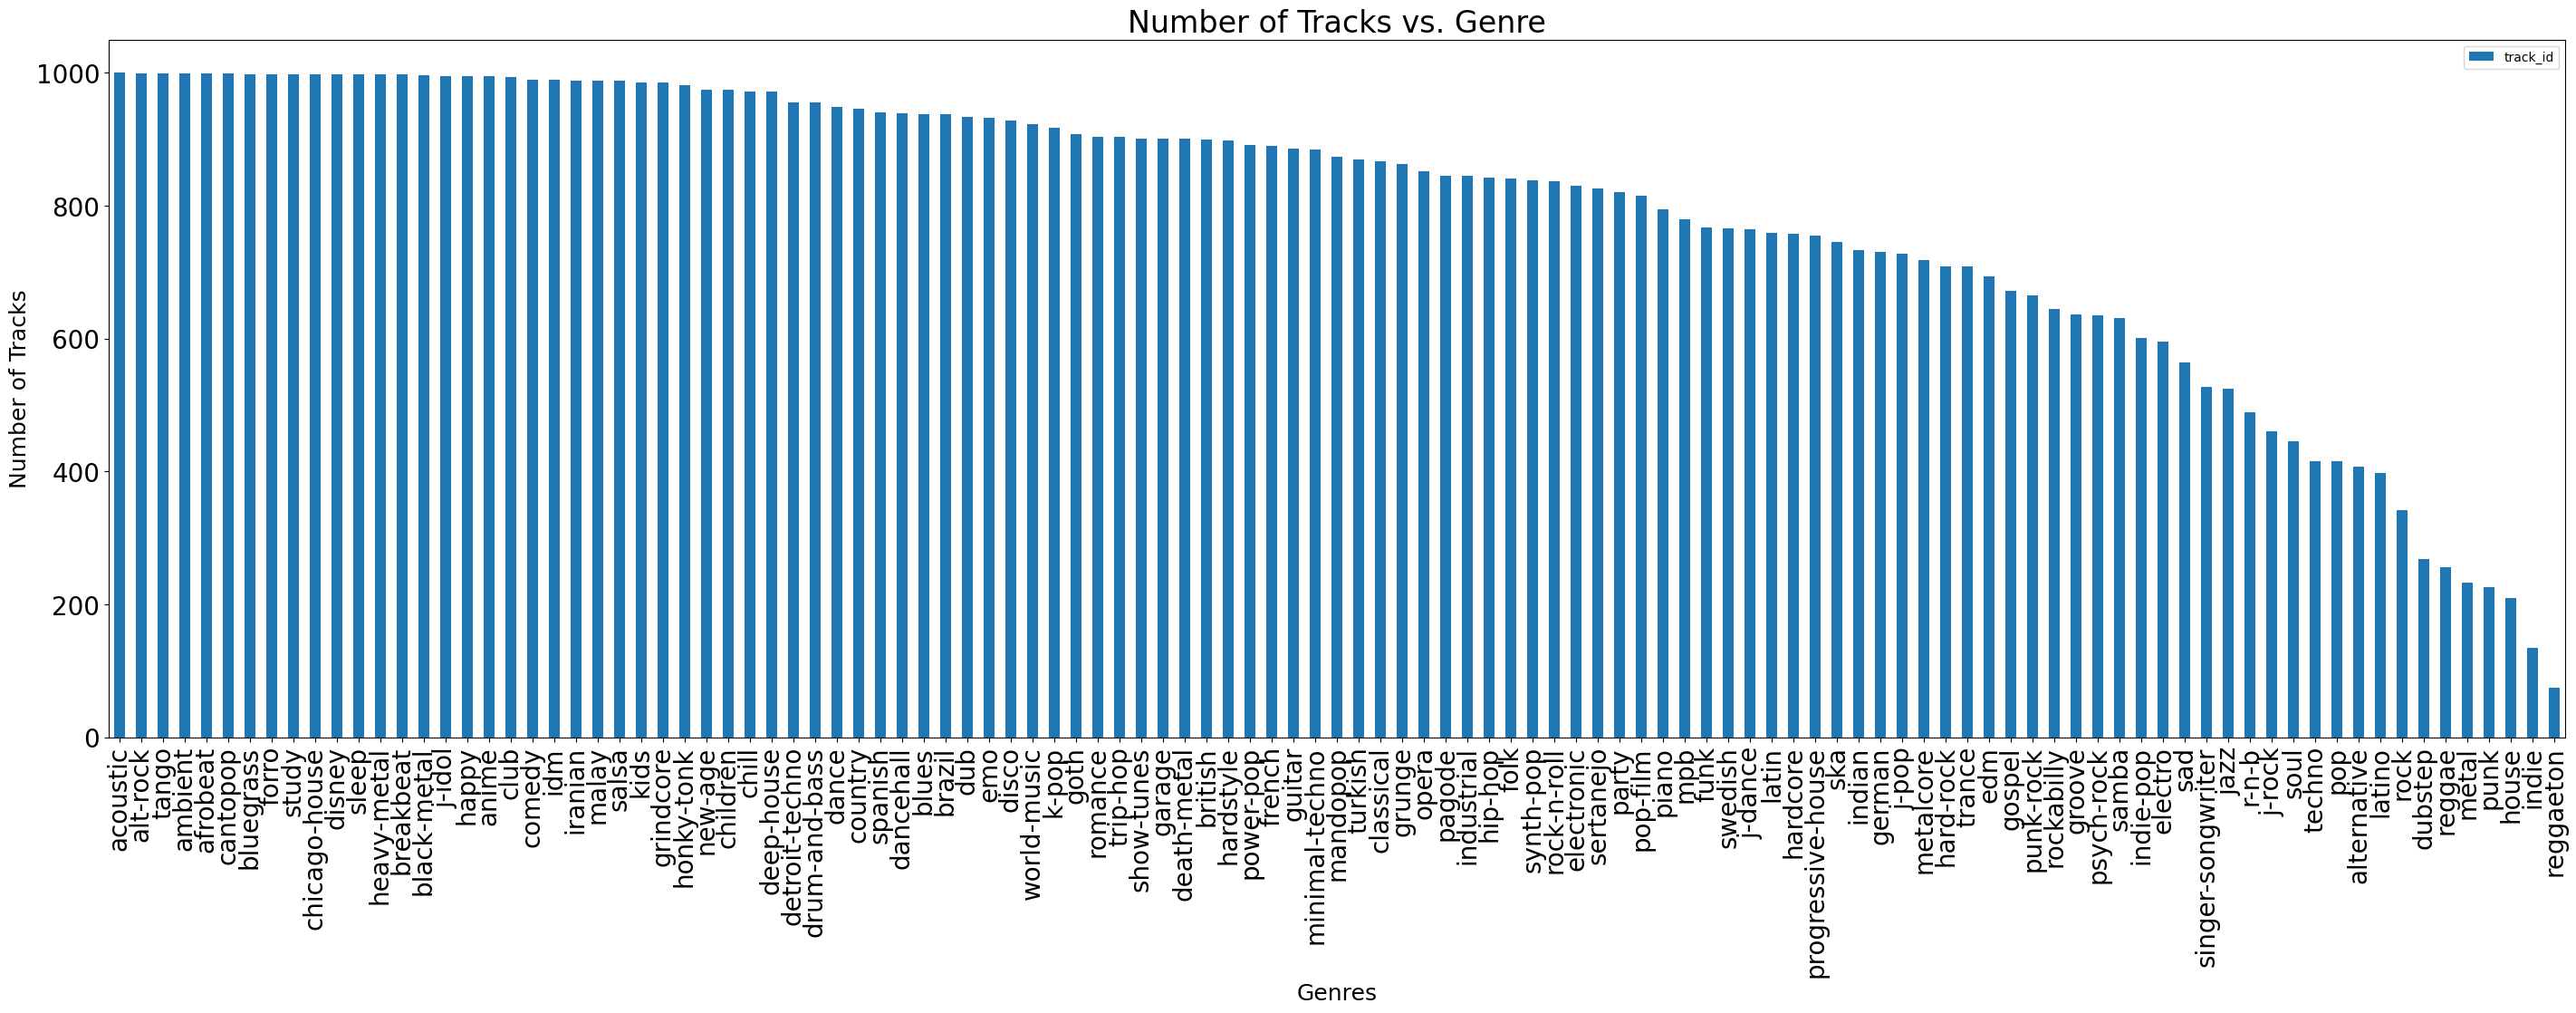

In [565]:
#Graph of Number of Tracks vs. Genre (whole cleaned dataset)
graph_1 = genres_count.plot(kind='bar', figsize = (35,10), fontsize = 20)
graph_1.set_title('Number of Tracks vs. Genre', fontsize = 24)
graph_1.set_xlabel('Genres', fontsize = 18)
graph_1.set_ylabel('Number of Tracks', fontsize = 18)
plt.show()

#lowest number of tracks in dataset is reggaeton genre

In [566]:
genres_count = genres.groupby('track_genre', as_index = False).count().sort_values('track_id', ascending = False)
genres_count

#Filter out only genres with 970-1000 tracks (I chose this parameter to make sure about same average data pts per genre)
filtered = genres_count[genres_count['track_id'] >=970] 
filtered #31 main genres

,track_genre,track_id
0,acoustic,1000
2,alt-rock,999
107,tango,999
4,ambient,999
1,afrobeat,999
12,cantopop,999
7,bluegrass,998
35,forro,998
104,study,998
13,chicago-house,998


Text(0.5, 1.0, 'Average Popularity Rating per Genre')

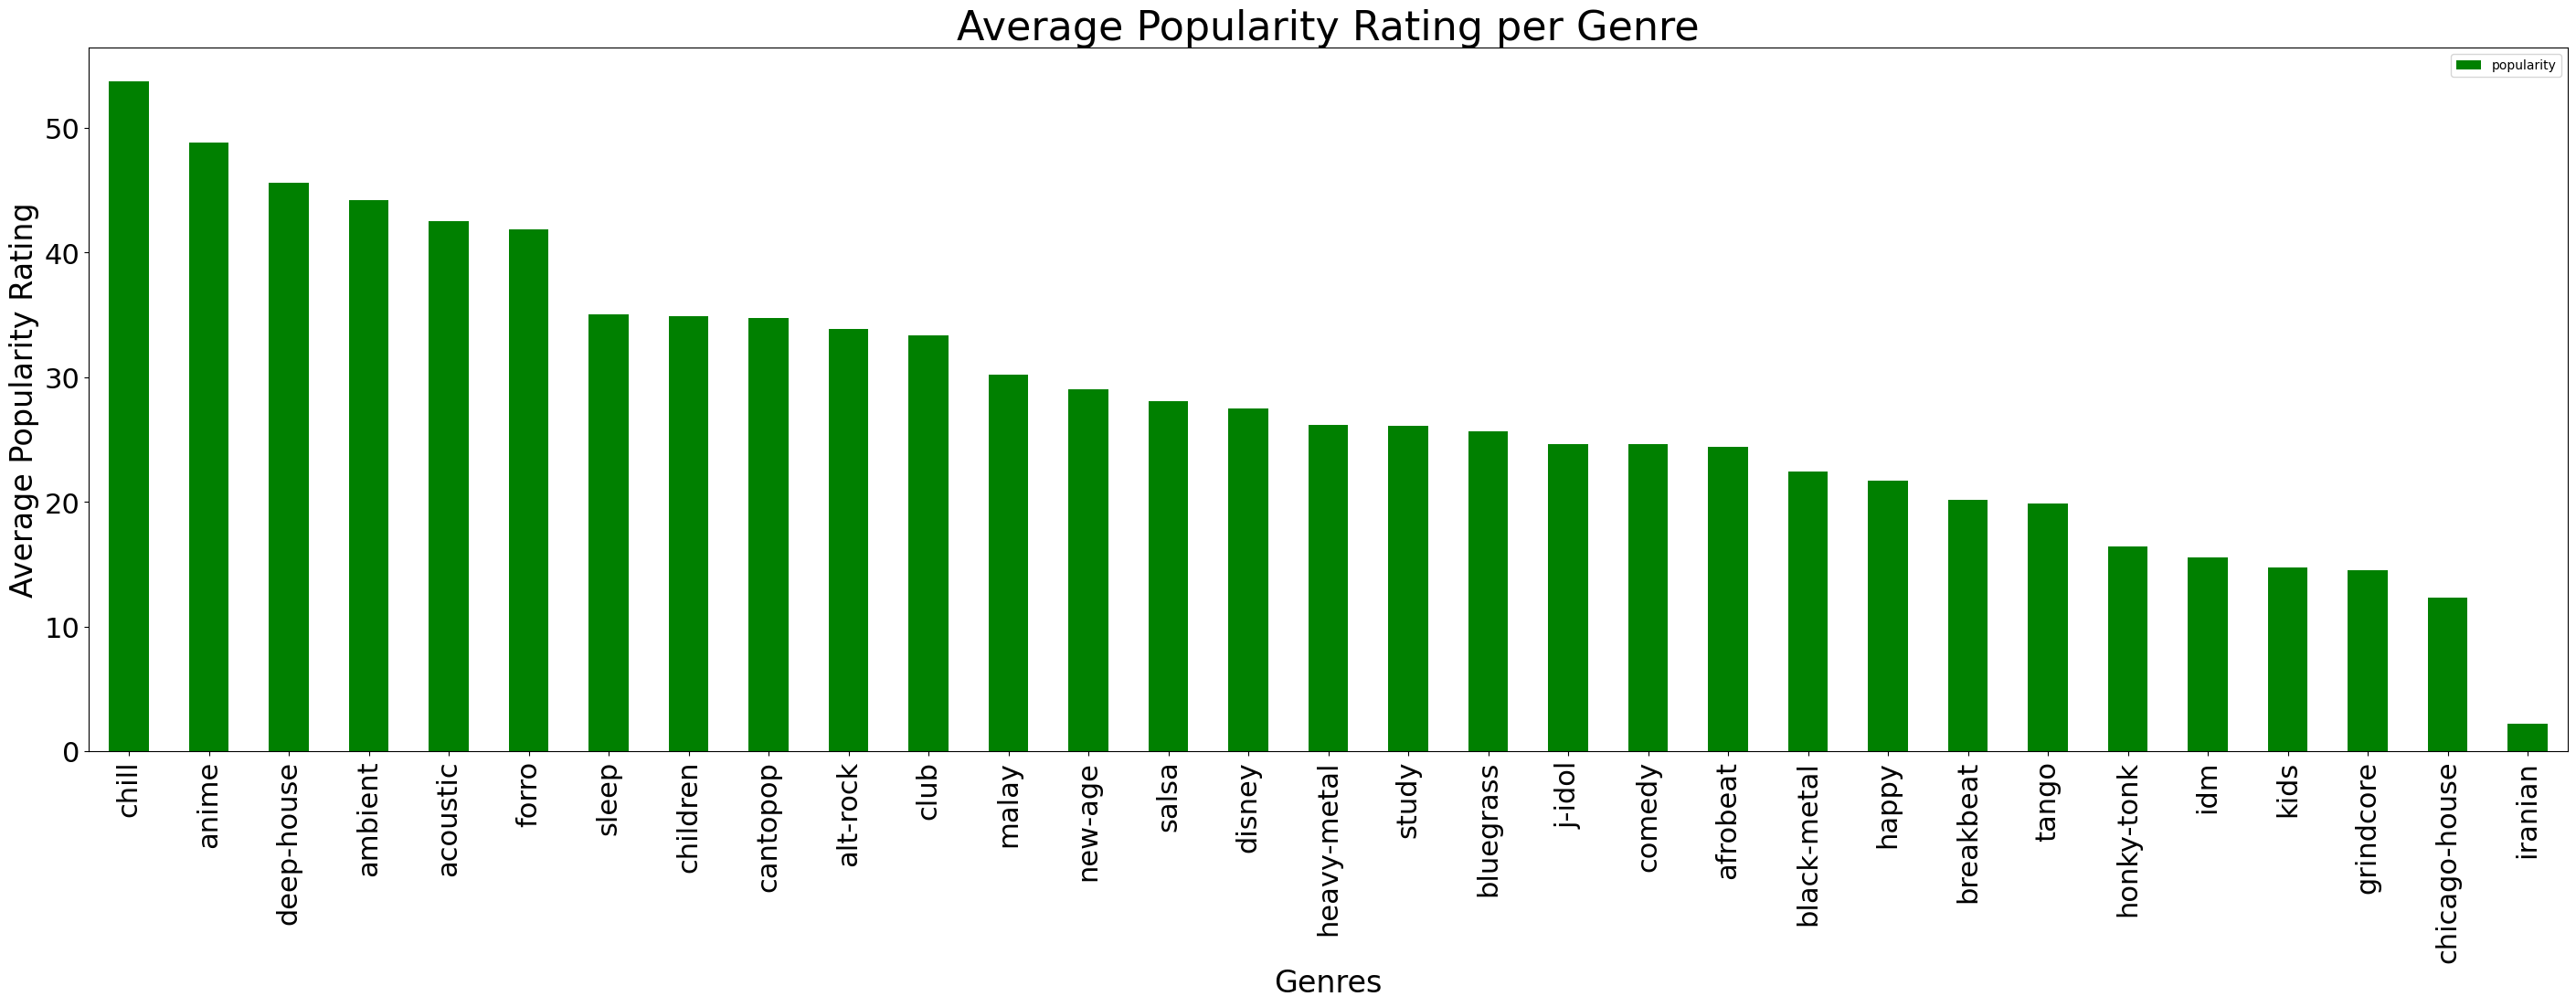

In [545]:
#Graphing filtered data of genres by average popularity rating 
filtered_genres = []
for i in filtered['track_genre']:
    filtered_genres.append(i)

genre_by_pop = genres[genres['track_genre'].isin([i for i in filtered_genres])]
mean_genre_pop = genre_by_pop.groupby('track_genre').mean()[['popularity']].sort_values('popularity', ascending = False)

#chill genre has the highest average popularity with 53.74 rating

graph_2 = mean_genre_pop.plot(kind='bar', figsize = (35,10), fontsize = 22, color = 'green')
graph_2.set_xlabel('Genres', fontsize = 24)
graph_2.set_ylabel('Average Popularity Rating', fontsize = 24)
graph_2.set_title('Average Popularity Rating per Genre', fontsize = 32)

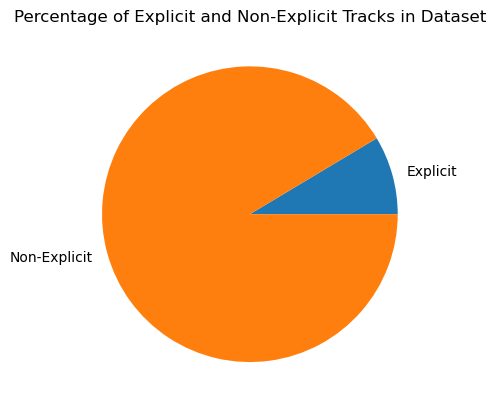

In [727]:
#Explicit Content of Dataset
#Hypothesis: I hypothesize at least half of the dataset will have explicit lyrics.

distinct_rows.groupby('explicit').count()
#There are 7704 explicit tracks in this dataset, and 82037 non-explicit tracks.

# import numpy as np
# import matplotlib.pyplot as plt

# (7704/89741)*100 #8.58% of all tracks are explicit
# (82037/89741)*100 #91.42% of all tracks are non-explicit

language = np.array([7704,82037])
labs = ['Explicit', 'Non-Explicit']
plt.pie(language, labels = labs)
plt.title('Percentage of Explicit and Non-Explicit Tracks in Dataset')
plt.show() 

In [580]:
#popularity of tracks among users 
#**Note: I chose to filter tracks with popularity rating 90 and above, to get the most popular tracks. I analyze
#this subset of the data for some subsquent questions.

popularity = distinct_rows[distinct_rows['popularity'] > 90]
popular = popularity[['track_name', 'popularity', 'artists', 'explicit', 'track_genre', 'duration_ms']]
popular.sort_values('popularity', ascending = False) #28 total tracks w/ popularity above 90

#According to data, 'Unholy' by Sam Smith and Kim Petras was the most popular track in October 2022 on Spotify.

# x = []
# for i in popular['track_name']:
#     x.append(i)

# y=[]
# for i in list(popular['popularity']):
#     y.append(i)

#Graph popularity
# graph_popular_tracks = plt.bar(x, y)
# plt.xlabel('Track Names')
# plt.ylabel('Popularity Rating')

,track_name,popularity,artists,explicit,track_genre,duration_ms
20001,Unholy (feat. Kim Petras),100,Sam Smith;Kim Petras,False,dance,156943
51664,"Quevedo: Bzrp Music Sessions, Vol. 52",99,Bizarrap;Quevedo,False,hip-hop,198937
20008,I'm Good (Blue),98,David Guetta;Bebe Rexha,True,dance,175238
67356,La Bachata,98,Manuel Turizo,False,latin,162637
67358,Me Porto Bonito,97,Bad Bunny;Chencho Corleone,True,latin,178567
67359,Tití Me Preguntó,97,Bad Bunny,False,latin,243716
67559,Efecto,96,Bad Bunny,False,latin,213061
20000,Under The Influence,96,Chris Brown,True,dance,184613
79000,I Ain't Worried,96,OneRepublic,False,piano,148485
67500,Ojitos Lindos,95,Bad Bunny;Bomba Estéreo,False,latin,258298


In [232]:
#explicit content percentage in top tracks

popularity_explicit = popular[popular['explicit'].isin([True])]
popularity_explicit #10 tracks are explicit 
#Hypothesis: A large amount of the top tracks will be explicit. Explicit lyrics may cause more engagement with the
#track/album itself. Often, tracks have the explicit label on pop music. Further data needed to verify this!

# (10/28)*100 #35.71% of popular tracks are explicit
# (18/28)*100 #64.29% of popular tracks are not explicit
#**Compared to overall dataset, a proportionally higher percentage of explicit tracks are in the top tracks list.

# grouped = dataset.groupby(['explicit', 'track_genre']).count()
# grouped
#language_by_genre = grouped[['track_id']].plot(kind='bar', title ="Explicit Content per Genre", figsize=(15, 10), fontsize=12)

,track_name,popularity,artists,explicit,track_genre
15013,Another Love,93,Tom Odell,True,chill
20000,Under The Influence,96,Chris Brown,True,dance
20008,I'm Good (Blue),98,David Guetta;Bebe Rexha,True,dance
20410,Super Freaky Girl,92,Nicki Minaj,True,dance
20850,CUFF IT,93,Beyoncé,True,dance
51203,Jimmy Cooks (feat. 21 Savage),91,Drake;21 Savage,True,hip-hop
67358,Me Porto Bonito,97,Bad Bunny;Chencho Corleone,True,latin
67603,Moscow Mule,94,Bad Bunny,True,latin
67865,Tarot,91,Bad Bunny;Jhayco,True,latin
67907,Caile,91,Luar La L,True,latin


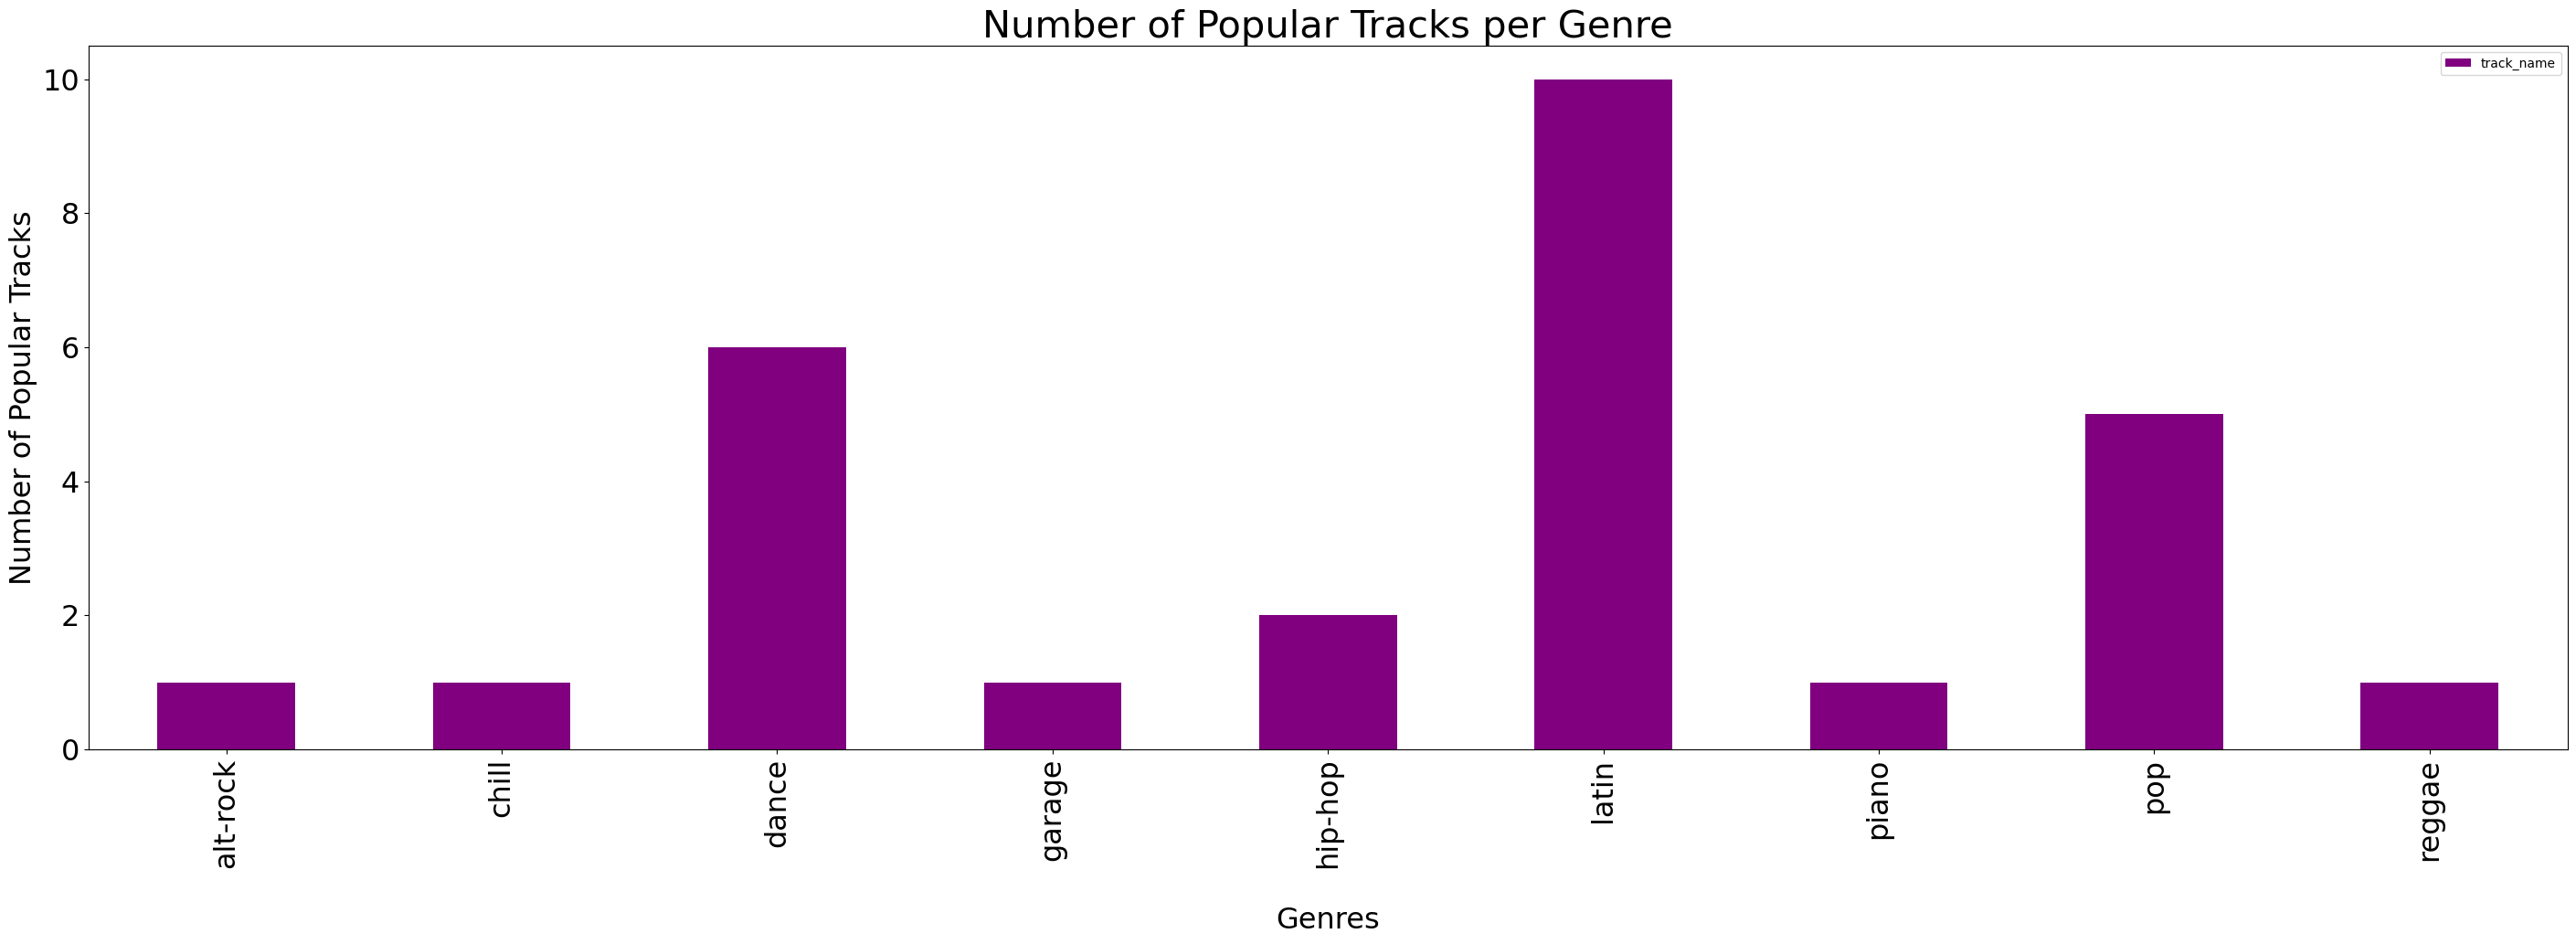

In [652]:
#genre breakdown of most popular tracks on Spotify in October 2022
#Note: for report, good to note that it's possible these track rankings can change day-to-day (esp when new albums
#from well-known artists drop as well as what songs blow up on TikTok)

#Hypothesis: Most of the top tracks will be from the Pop genre.

popular_by_genre = popular[['track_genre', 'track_name']].groupby('track_genre').count()
popular_by_genre.sort_values('track_name', ascending=False)
#10/28 (35.71%) popular tracks are from the latin genre. This seems to be the most popular genre in the top tracks.
#Latin music even beat pop music in the top tracks. 5/28 * 100 = 17.86% of popular tracks are pop

plt_2 = popular_by_genre.plot(kind='bar', figsize = (35,10), fontsize = 23, color = color)
plt_2.set_xlabel('Genres', fontsize = 23, labelpad=30)
plt_2.set_ylabel('Number of Popular Tracks', fontsize = 23)
plt_2.set_title('Number of Popular Tracks per Genre', fontsize = 30)
color = ['purple']
plt.show()


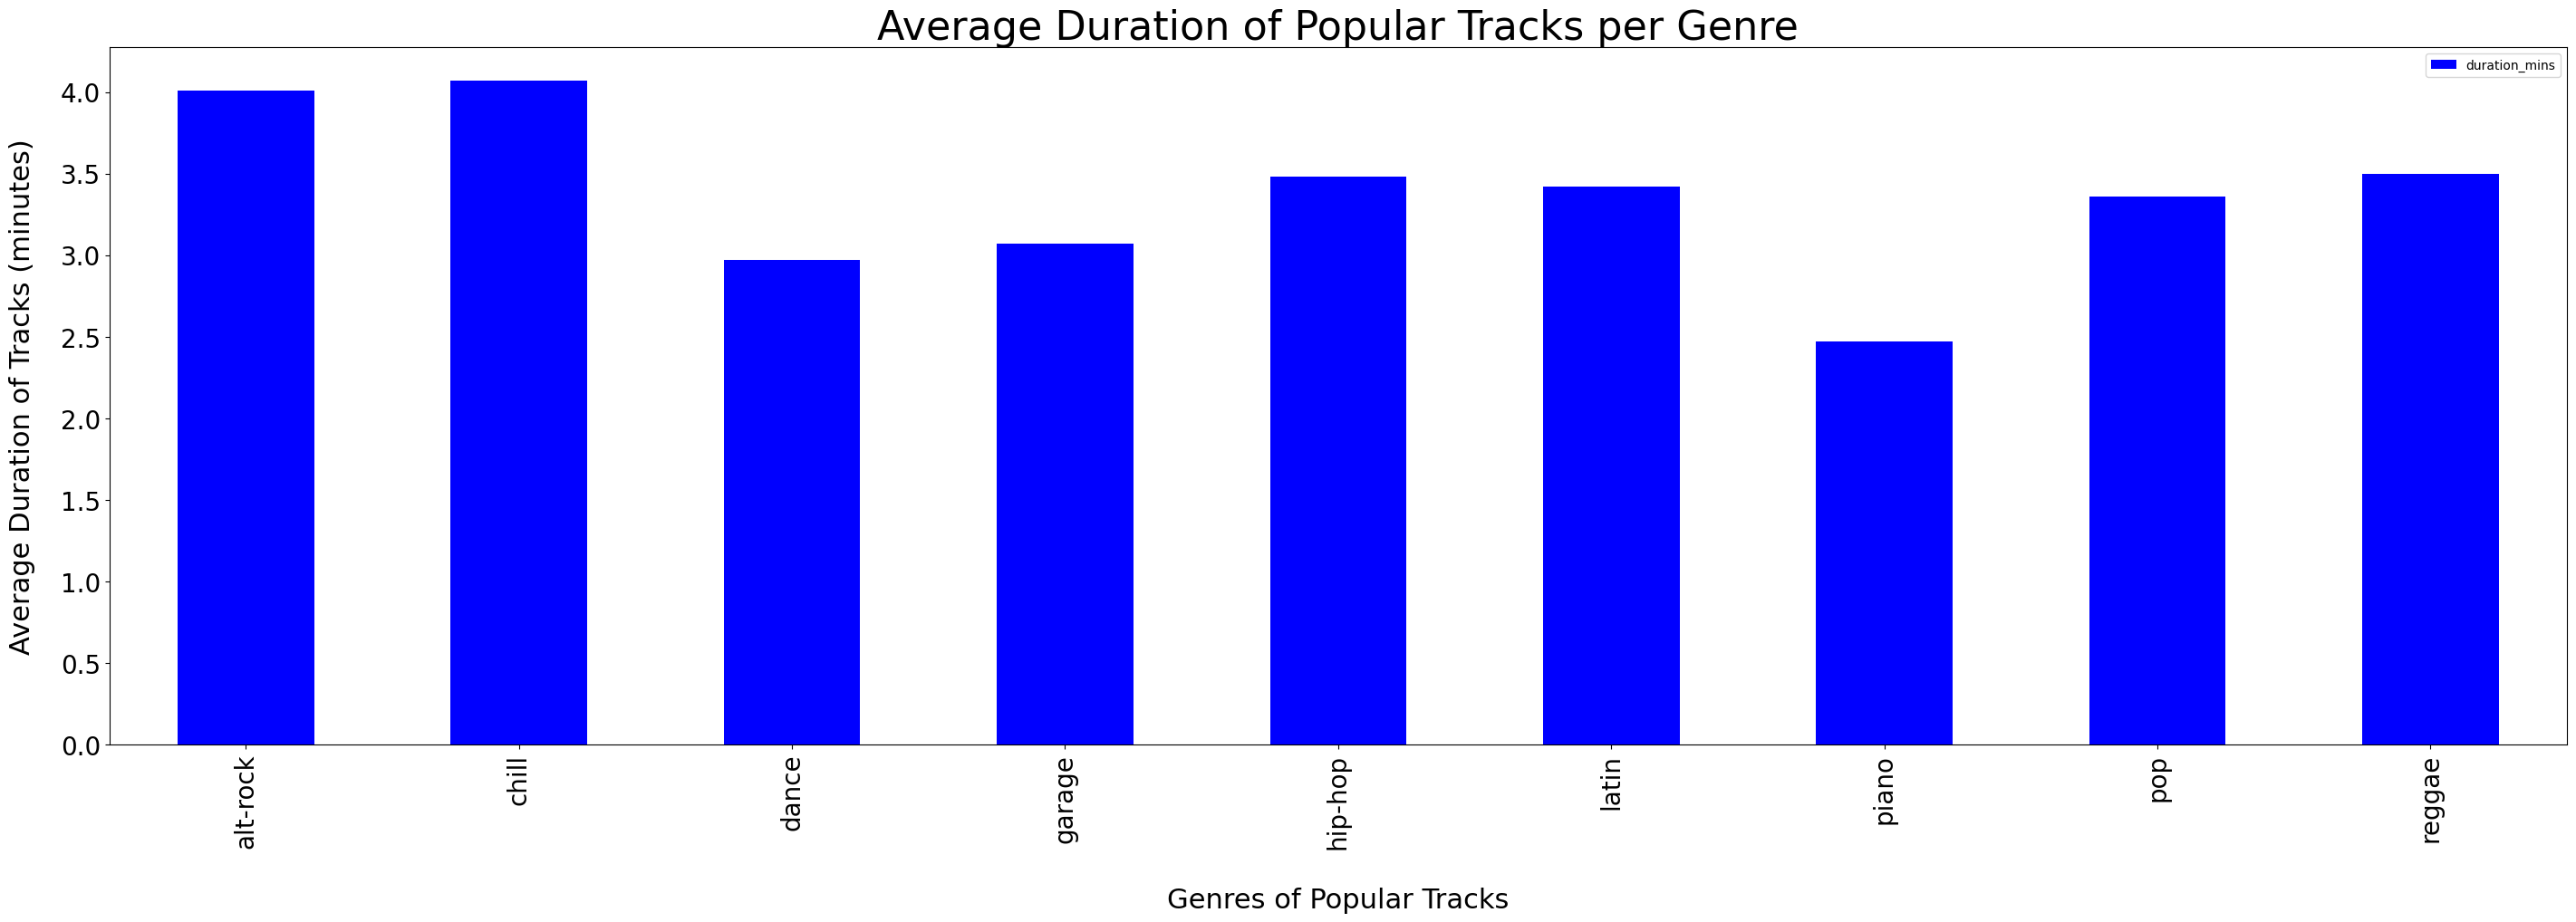

In [729]:
#Average duration of top tracks per genre?
av_dur_pop = popular[['track_genre', 'duration_ms']]
av_dur_pop = pd.DataFrame(av_dur_pop)

def mins(dur_ms):
    s = dur_ms/1000
    return s/60

av_dur_pop['duration_mins'] = av_dur_pop['duration_ms'].apply(mins)

final = av_dur_pop.groupby('track_genre').mean().round(decimals = 2)
finall = final.drop('duration_ms', axis = 'columns')
finall #Longest popular songs are in the chill genre. The range in average duration for top tracks is from 2.47 mins
#to 4.07 mins. The shortest popular songs on average are from the piano genre. Interestingly, pop songs in 
#top tracks list average to about 3.36 minutes. 

graph_3 = finall.plot(kind='bar', figsize = (35,10), fontsize = 20, color = 'blue')
graph_3.set_xlabel('Genres of Popular Tracks', fontsize = 22, labelpad=30)
graph_3.set_ylabel('Average Duration of Tracks (minutes)', fontsize = 22, labelpad=20)
graph_3.set_title('Average Duration of Popular Tracks per Genre', fontsize = 32)
plt.show()

In [579]:
#What is the average duration of the songs in the dataset? *using filtered data with roughly same number of datapts
song_duration_data = distinct_rows[['track_id', 'track_name', 'artists','track_genre', 'duration_ms']]
duration = song_duration_data['duration_ms']
duration.mean() #229142 ms
(229142/1000)/60 #3.82 minutes on average songs in dataset (some skewing of data possible due to not same # of data
#points per genre of music)

3.819033333333333

In [690]:
#How much of dataset is likely live tracks? According to dataset background info,
#"A value above 0.8 provides strong likelihood that the track is live"

live = distinct_rows[['track_id', 'liveness']]
live_high_probability = live[live['liveness'] > 0.8]

live_high_probability.count() #2865 tracks are likely live performances

(2865/89741)*100 #3.19% of all tracks in dataset are likely live performances. The rest are likely
#produced tracks, recorded with equipment.

track_id    2865
liveness    2865
dtype: int64

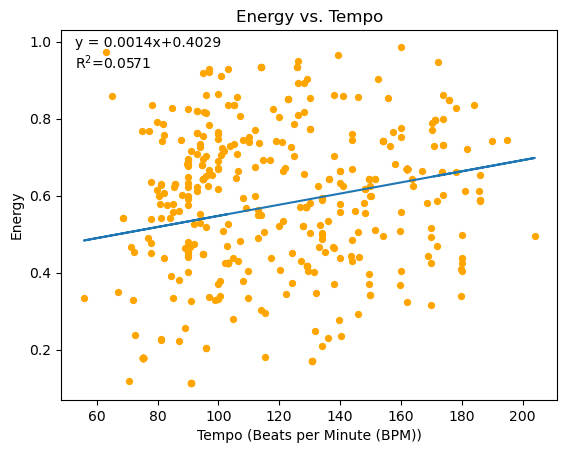

PearsonRResult(statistic=0.23892942812037604, pvalue=8.216852559015434e-07)

In [837]:
#How are tempo and energy related for pop music only? (scatter plot)
from scipy import stats
from scipy.stats import pearsonr

tempo = distinct_rows[['tempo', 'track_genre']]
energy = distinct_rows[['energy', 'track_genre']]

pop_tempo = tempo[tempo['track_genre'].isin(['pop'])]
pop_energy = energy[energy['track_genre'].isin(['pop'])]
pt = pop_tempo.drop('track_genre', axis = 'columns')
pe = pop_energy.drop('track_genre', axis = 'columns')

empty_list = []
for i in pt['tempo']:
    empty_list.append(i)

empty_list2 = []
for i in pe['energy']:
    empty_list2.append(i)

arr = np.array(empty_list)

arr2 = np.array(empty_list2)
    
scatter = plt.scatter(arr, arr2, c = 'orange', s = 18)
plt.title("Energy vs. Tempo")
plt.xlabel("Tempo (Beats per Minute (BPM))")
plt.ylabel("Energy")

slope, intercept, rvalue, pvalue, stderr = stats.linregress(arr, arr2)
plt.plot(arr, slope*arr+intercept)
plt.annotate("y = %.4fx+%.4f\nR$^2$=%.4f"%(slope, intercept, rvalue**2),xy = (53, .93))
plt.show()

pearsonr(arr, arr2)
# m, b = np.polyfit(arr, arr2, 1)
# plt.plot(arr, m*arr+b, linestyle='--', linewidth=1)
# plt.text(53, .9, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(m) + 'x', size=10)
